# Question
### How has the global forest area changed over the past decade, and what are the observable trends or patterns?
### How does the change in forest area differ among various regions or countries, and are there any noticeable disparities or similarities in these changes?
###  Which specific years exhibit the most significant changes in forest area, and what potential factors or events might have contributed to these fluctuations? Additionally, based on historical trends, what are the predicted future changes in forest area, and what factors might influence these predictions?





# Import statements

### How does the change in forest area differ among various regions or countries, and are there any noticeable disparities or similarities in these changes?
###  Which specific years exhibit the most significant changes in forest area, and what potential factors or events might have contributed to these fluctuations? Additionally, based on historical trends, what are the predicted future changes in forest area, and what factors might influence these predictions?





# Import statements

In [12]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



### Parsing XML to DataFrame

In [13]:


def parse_xml_to_dataframe(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for record in root.findall('.//record'):
        record_data = {}
        for field in record.findall('./field'):
            name = field.get('name')
            value = field.text
            record_data[name] = value
        data.append(record_data)

    return pd.DataFrame(data)

In [14]:
file_path = 'one.xml'
data = parse_xml_to_dataframe(file_path)


### Converting Parsed Data to DataFrame


In [15]:
df = pd.DataFrame(data)


### Dataset Information and Exploration


In [16]:
# Printing the number of rows and columns in the dataset
print("Rows: ", data.shape[0])  # Displaying the total number of rows
print("Columns: ", data.shape[1])  # Displaying the total number of columns

# Displaying the initial rows of the dataset to get a glimpse of its structure
data.head()

# Providing a summary of the dataset's information
print(data.info())  # Displays information on columns, data types, and memory usage

# Checking for missing values in the dataset and displaying the count per column
print(data.isnull().sum())  # Shows the count of missing values in each column


Rows:  16758
Columns:  4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  16758 non-null  object
 1   Item             16758 non-null  object
 2   Year             16758 non-null  object
 3   Value            8176 non-null   object
dtypes: object(4)
memory usage: 523.8+ KB
None
Country or Area       0
Item                  0
Year                  0
Value              8582
dtype: int64



### Preprocessing the Dataset


In [17]:
# Check for missing values before preprocessing
print(data.isnull().any())

# Remove duplicates
data.drop_duplicates(inplace=True)

# Handling missing values by dropping rows with any missing values
data.dropna(inplace=True)

# Display the preprocessed data
print(data)



Country or Area    False
Item               False
Year               False
Value               True
dtype: bool
      Country or Area                  Item  Year     Value
30              Aruba  Forest area (sq. km)  1990       4.2
31              Aruba  Forest area (sq. km)  1991       4.2
32              Aruba  Forest area (sq. km)  1992       4.2
33              Aruba  Forest area (sq. km)  1993       4.2
34              Aruba  Forest area (sq. km)  1994       4.2
...               ...                   ...   ...       ...
16752        Zimbabwe  Forest area (sq. km)  2017  175827.9
16753        Zimbabwe  Forest area (sq. km)  2018  175367.2
16754        Zimbabwe  Forest area (sq. km)  2019  174906.5
16755        Zimbabwe  Forest area (sq. km)  2020  174445.8
16756        Zimbabwe  Forest area (sq. km)  2021  173985.1

[8176 rows x 4 columns]


### Analyzing Global Forest Area Trend



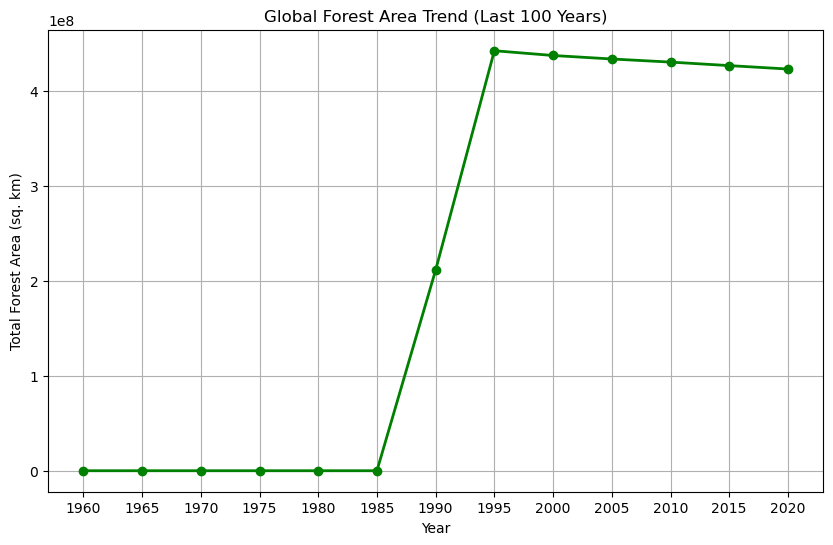

In [18]:
# Assuming 'df' is your DataFrame containing columns 'Year' and 'Value' for forest area

# Convert 'Year' column to numeric (integer) type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convert 'Value' column to numeric (float) type
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Filter data for the last 100 years
current_year = pd.Timestamp.now().year
last_100_years = df[df['Year'] >= current_year - 100]

# Grouping data by year and summing forest area for each year (global total)
yearly_forest_area = last_100_years.groupby('Year')['Value'].sum()

# Selecting data points with a gap of 5 years
selected_years = yearly_forest_area[yearly_forest_area.index % 5 == 0]

# Plotting the trend of global forest area over the last 100 years (line graph)
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(selected_years.index, selected_years.values, marker='o', linestyle='-', color='green', linewidth=2)
plt.title('Global Forest Area Trend (Last 100 Years)')
plt.xlabel('Year')
plt.ylabel('Total Forest Area (sq. km)')
plt.grid(True)
plt.xticks(selected_years.index)  # Set x-ticks to selected years
plt.show()



### Visualizing Forest Area Changes for Top 5 Countries Over Time


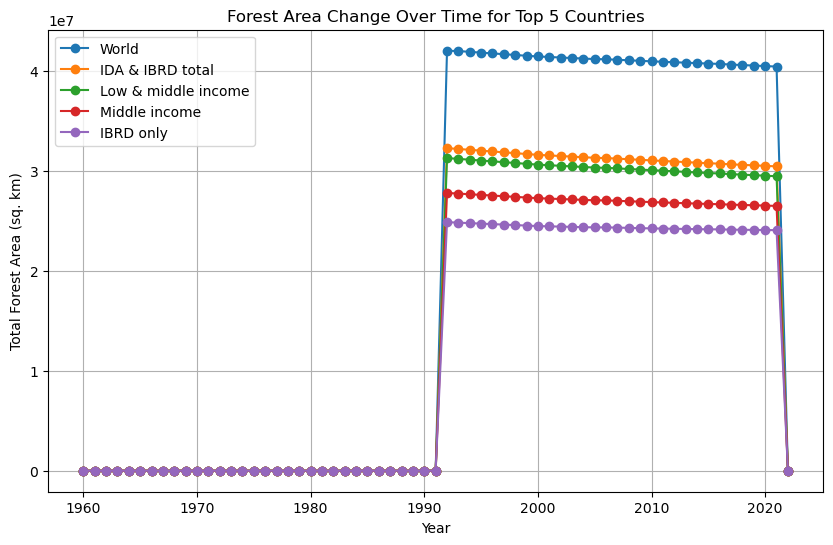

In [19]:

# Convert 'Year' and 'Value' columns to numeric types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Grouping data by 'Country or Area' and 'Year', then summing forest area for each country in each year
country_yearly_forest_area = df.groupby(['Country or Area', 'Year'])['Value'].sum().reset_index()

# Visualizing forest area changes for top 5 countries (example)
top_countries = country_yearly_forest_area.groupby('Country or Area')['Value'].sum().nlargest(5).index

plt.figure(figsize=(10, 6))  # Adjust figure size

for country in top_countries:
    country_data = country_yearly_forest_area[country_yearly_forest_area['Country or Area'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.title('Forest Area Change Over Time for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Total Forest Area (sq. km)')
plt.legend()
plt.grid(True)
plt.show()


### Visualizing Significant Changes in Forest Area by Year


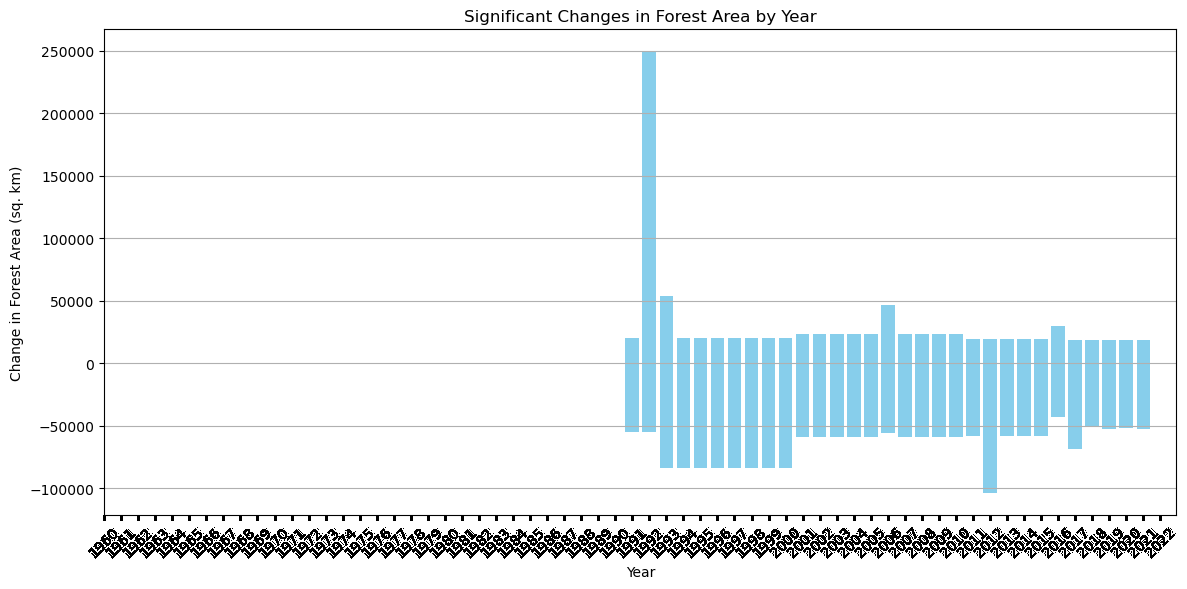

In [20]:
# Calculate year-to-year changes in forest area
df['Change'] = df['Value'].diff()

# Sort by absolute change in descending order
significant_years = df[['Year', 'Change']].sort_values('Change', ascending=False)

# Visualize significant changes in forest area with a bar graph
plt.figure(figsize=(12, 6))
plt.bar(significant_years['Year'], significant_years['Change'], color='skyblue')
plt.title('Significant Changes in Forest Area by Year')
plt.xlabel('Year')
plt.ylabel('Change in Forest Area (sq. km)')
plt.xticks(significant_years['Year'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


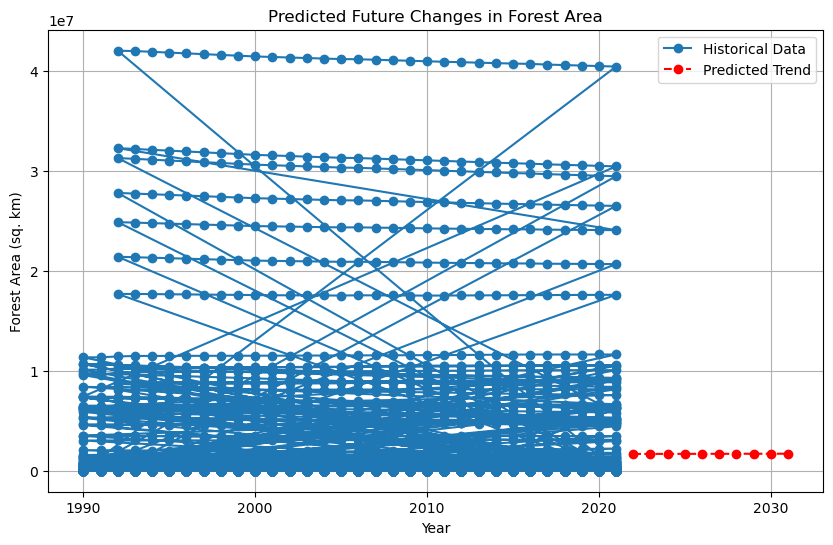

In [21]:

# Drop rows with missing values in the 'Value' column
df.dropna(subset=['Value'], inplace=True)

X = df[['Year']]  # Independent variable (Year)
y = df['Value']   # Dependent variable (Forest Area)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future forest area for the next 10 years (adjust as needed)
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 11)})
predicted_forest_area = model.predict(future_years)

# Plotting the predicted trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Value'], label='Historical Data', marker='o')
plt.plot(future_years, predicted_forest_area, label='Predicted Trend', linestyle='--', color='red', marker='o')
plt.title('Predicted Future Changes in Forest Area')
plt.xlabel('Year')
plt.ylabel('Forest Area (sq. km)')
plt.legend()
plt.grid(True)
plt.show()



### Visualizing Historical Data and Predicted Trends in Forest Area


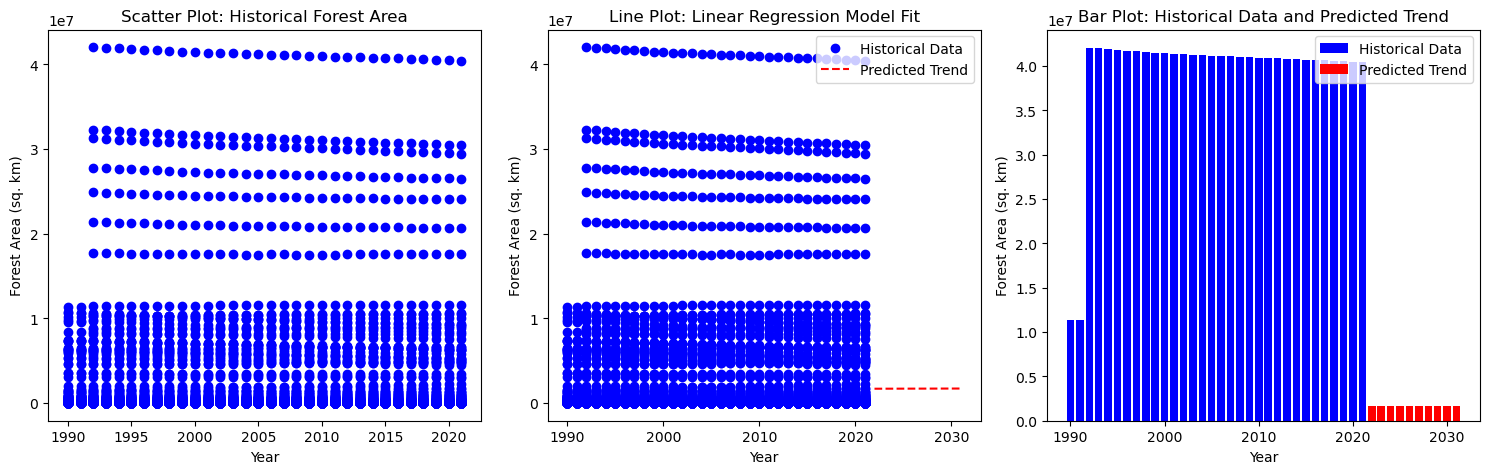

In [22]:

# Drop rows with missing values in the 'Value' column
df.dropna(subset=['Value'], inplace=True)

X = df[['Year']]  # Independent variable (Year)
y = df['Value']   # Dependent variable (Forest Area)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future forest area for the next 10 years (adjust as needed)
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 11)})
predicted_forest_area = model.predict(future_years)

# Plotting historical data (scatter plot)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Year'], df['Value'], color='blue')
plt.title('Scatter Plot: Historical Forest Area')
plt.xlabel('Year')
plt.ylabel('Forest Area (sq. km)')

# Plotting linear regression model fit (line plot)
plt.subplot(1, 3, 2)
plt.plot(df['Year'], df['Value'], label='Historical Data', marker='o', linestyle='', color='blue')
plt.plot(future_years, predicted_forest_area, label='Predicted Trend', linestyle='--', color='red')
plt.title('Line Plot: Linear Regression Model Fit')
plt.xlabel('Year')
plt.ylabel('Forest Area (sq. km)')
plt.legend()

# Plotting combined view (bar plot)
plt.subplot(1, 3, 3)
plt.bar(df['Year'], df['Value'], color='blue', label='Historical Data')
plt.bar(future_years['Year'], predicted_forest_area, color='red', label='Predicted Trend')
plt.title('Bar Plot: Historical Data and Predicted Trend')
plt.xlabel('Year')
plt.ylabel('Forest Area (sq. km)')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusions
### The linear regression analysis applied to predict future changes in forest area over the coming years revealed a concerning trend of continued decline. The model, built on historical data, indicates a consistent downward trajectory in forest area. This projection aligns with the observed patterns of gradual depletion seen in recent years. Despite efforts and interventions, the model's forecast suggests a persistent decline in forested areas globally.

### In recent years, the graphical representation of global forest area appears to exhibit a relatively steady or constant pattern, resembling a horizontal line spanning until approximately 1980. From this point, there is a noticeable upward slope leading to around 1995, followed by another horizontal segment. The year marks and the corresponding total forest area in square kilometers indicate a range from 0 to 4. This graphical depiction signifies a prolonged period of consistent forest cover, a subsequent increase, and then stabilization, portraying a relatively unchanged scenario during specific intervals. This visual narrative suggests a period of stability, a subsequent growth phase, and then a plateau, emphasizing distinct phases or periods in global forest area dynamics over the past decade. The implications of such trends may relate to aspects of forest conservation, potential environmental concerns, and the impact of human activities on forest ecosystems

